<a href="https://colab.research.google.com/github/jemtoronto/datathon1/blob/main/Team_5_HAD7001_S25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datathon 1- Team 5: Chantelle, David-Dan, Jemal



### Import neccessary libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

### Import files

In [ ]:
file_path = '/content/drive/MyDrive/Datathon1-Dataset2 - HAD7001.csv'
df = pd.read_csv(file_path)

print(df)

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56  Female            3091            90                160   
1       69  Female            2090           106                 27   
2       46    Male            2938            11                 45   
3       32  Female            3022            48                112   
4       60  Female            2350            83                115   
...    ...     ...             ...           ...                ...   
23530   51  Female            2858            65                 37   
23531   20  Female            2573            27                 27   
23532   26  Female            2246            37                 44   
23533   22    Male            1588            24                101   
23534   59    Male            3099            59                 61   

       Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  
0                        4            1  1.569070  81.199394  32.981343  

### Data cleaning
##### Removing any rows with missing values
##### Re-code gender features (male=0, female=1)
##### Round BMI to nearest interger, BMI feature categorized into binary classes (greater than or equal to 30 is obese, less than 30 is normal)
##### Delete height and weight from the dataset
##### Create two spread sheets. The health-related with features: caloric intake, sugar intake, physical activity, frequency of fast food consumption, and screen time. The demographic with the features: age and gender.

In [ ]:
df = df.dropna()
print(df)

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56  Female            3091            90                160   
1       69  Female            2090           106                 27   
2       46    Male            2938            11                 45   
3       32  Female            3022            48                112   
4       60  Female            2350            83                115   
...    ...     ...             ...           ...                ...   
23530   51  Female            2858            65                 37   
23531   20  Female            2573            27                 27   
23532   26  Female            2246            37                 44   
23533   22    Male            1588            24                101   
23534   59    Male            3099            59                 61   

       Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  
0                        4            1  1.569070  81.199394  32.981343  

In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
print(df)

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56       1            3091            90                160   
1       69       1            2090           106                 27   
2       46       0            2938            11                 45   
3       32       1            3022            48                112   
4       60       1            2350            83                115   
...    ...     ...             ...           ...                ...   
23530   51       1            2858            65                 37   
23531   20       1            2573            27                 27   
23532   26       1            2246            37                 44   
23533   22       0            1588            24                101   
23534   59       0            3099            59                 61   

       Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  
0                        4            1  1.569070  81.199394  32.981343  

<ipython-input-82-2d592a891edc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


In [ ]:
df['BMI'] = df['BMI'].round(0)
df['obesity'] = df['BMI'].apply(lambda x: 1 if x >= 30 else 0)
print(df)

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56       1            3091            90                160   
1       69       1            2090           106                 27   
2       46       0            2938            11                 45   
3       32       1            3022            48                112   
4       60       1            2350            83                115   
...    ...     ...             ...           ...                ...   
23530   51       1            2858            65                 37   
23531   20       1            2573            27                 27   
23532   26       1            2246            37                 44   
23533   22       0            1588            24                101   
23534   59       0            3099            59                 61   

       Fast_Food_Frequency  Screen_Time    Height     Weight   BMI  obesity  
0                        4            1  1.569070  81.199394  33.0   

In [ ]:
final_df = df.drop(columns=['Height', 'Weight'])
health_related = df[['Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', "BMI", "obesity"]]
demographic = df[['Age', 'Gender', "BMI", "obesity"]]

print(final_df)
print(health_related)
print(demographic)

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56       1            3091            90                160   
1       69       1            2090           106                 27   
2       46       0            2938            11                 45   
3       32       1            3022            48                112   
4       60       1            2350            83                115   
...    ...     ...             ...           ...                ...   
23530   51       1            2858            65                 37   
23531   20       1            2573            27                 27   
23532   26       1            2246            37                 44   
23533   22       0            1588            24                101   
23534   59       0            3099            59                 61   

       Fast_Food_Frequency  Screen_Time   BMI  obesity  
0                        4            1  33.0        1  
1                        0       

### Check variables for class imbalance and outliers

In [ ]:
#Binary or Categorical
gender_count = final_df['Gender'].value_counts()
gender_percentage = (final_df['Gender'].value_counts(normalize=True) * 100).round(2)

obesity_count = final_df['obesity'].value_counts()
obesity_percentage = (final_df['obesity'].value_counts(normalize=True) * 100).round(2)

fff_count = final_df['Fast_Food_Frequency'].value_counts()
fff_percentage = (final_df['Fast_Food_Frequency'].value_counts(normalize=True) * 100).round(2)

# Table
gender_table = pd.DataFrame({
    'Count': gender_count,
    'Percentage': gender_percentage
})
obesity_table = pd.DataFrame({
    'Count': obesity_count,
    'Percentage': obesity_percentage
})
fff_table = pd.DataFrame({
    'Count': fff_count,
    'Percentage': fff_percentage
})

print(gender_table)
print(obesity_table)
print(fff_table)

        Count  Percentage
Gender                   
1       14896       63.29
0        8639       36.71
         Count  Percentage
obesity                   
0        16713       71.01
1         6822       28.99
                     Count  Percentage
Fast_Food_Frequency                   
4                     4800       20.40
3                     4751       20.19
2                     4685       19.91
1                     4681       19.89
0                     4618       19.62


In [ ]:
continuous_vars = ['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Screen_Time']
mean_sd = final_df[continuous_vars].agg(['mean', 'std']).round(2)

print("\nMean and Standard Deviation for Continuous Variables:")
print(mean_sd)



Mean and Standard Deviation for Continuous Variables:
        Age  Calorie_Intake  Sugar_Intake  Physical_Activity  Screen_Time
mean  48.53         2495.85         64.82              89.50         5.49
std   17.87          577.80         32.00              52.12         3.45


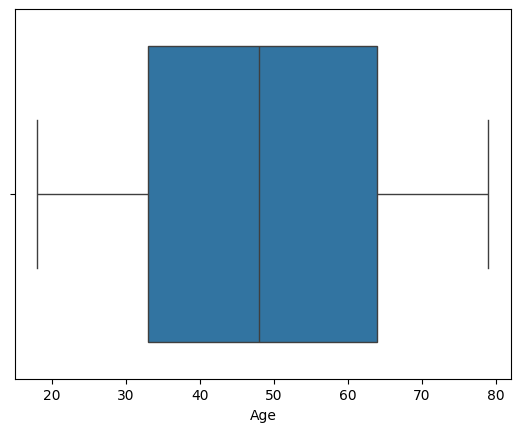

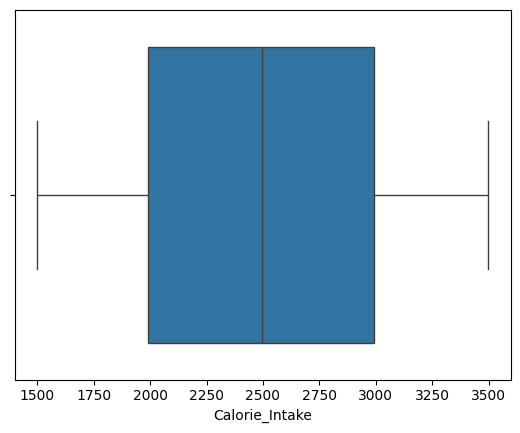

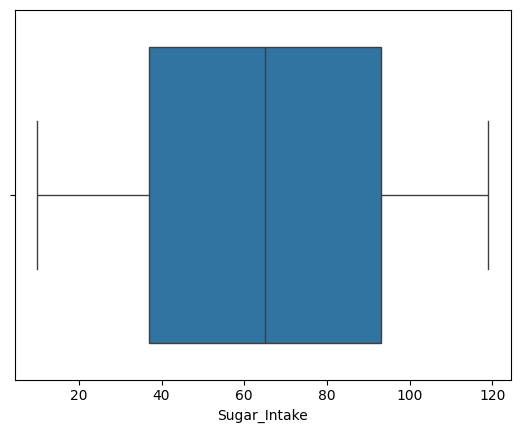

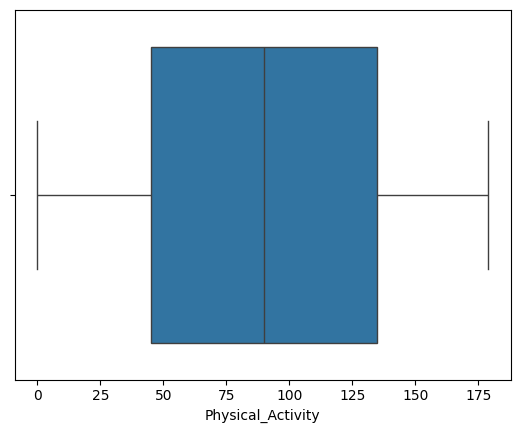

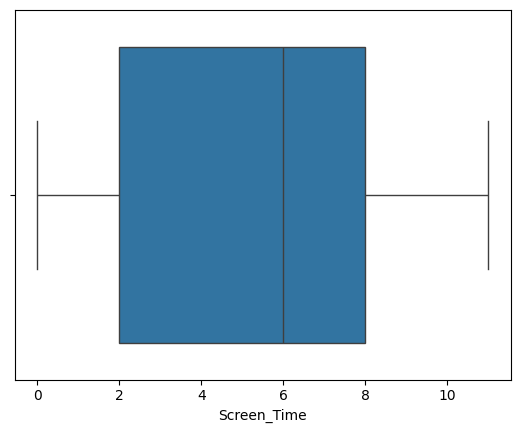

In [ ]:
sns.boxplot(x=final_df['Age'])
plt.show()

sns.boxplot(x=final_df['Calorie_Intake'])
plt.show()

sns.boxplot(x=final_df['Sugar_Intake'])
plt.show()

sns.boxplot(x=final_df['Physical_Activity'])
plt.show()

sns.boxplot(x=final_df['Screen_Time'])
plt.show()

###Elbow Method
####Exploring potential values for k based on elbow method
####Please note the elbow method is exploratory and the final k will be ascertained based on expertise

Max precision = 0.59; k = 10
Max recall = 0.7; k = 20
Max f1 score = 0.61; k = 5


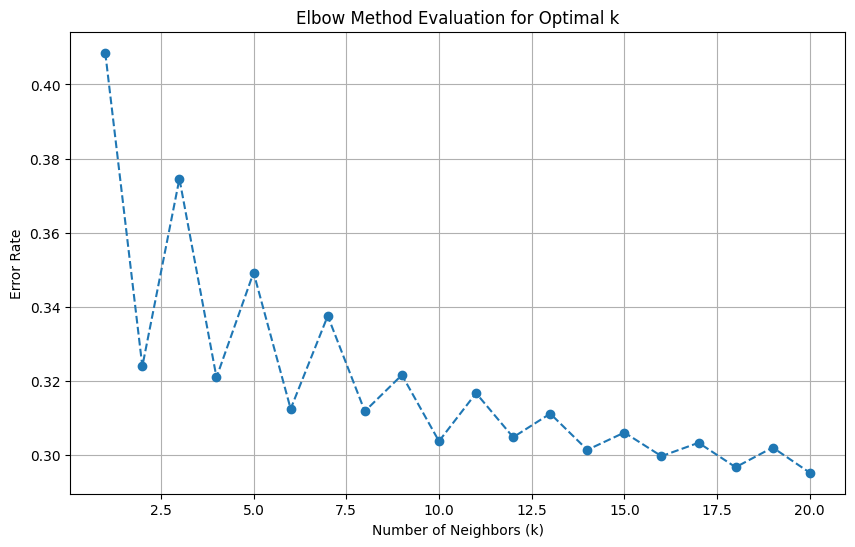

In [ ]:
# Range of k values from 1 to 20
k_range = range(1, 21)

# Split data into features and label
X = final_df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]
y = final_df[['obesity']]

# Split data into training and testing sets with stratification to mitigate outcome class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Error rates, f1-score, precision, recall, and accuracy for each k value.
error_list = []
precision_list = []
recall_list = []
f1_score_list = []
accuracy_list = []

# Loop over k_values to train and test the KNN classifier
for k in k_range:
    # Initialize a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

    # Train the classifier on the training data. Ravel data per error message when not included.
    knn.fit(X_train, y_train.values.ravel())

    # Predict the labels for the test set
    y_pred = knn.predict(X_test)

    # Calculate errir
    error = 1 - accuracy_score(y_test, y_pred)
    error_list.append(error)

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_score_list.append(report['weighted avg']['f1-score'])

print("Max precision = {}; k = {}".format(np.max(precision_list).round(2), precision_list.index(np.max(precision_list))+1 ))
print("Max recall = {}; k = {}".format(np.max(recall_list).round(2), recall_list.index(np.max(recall_list))+1 ))
print("Max f1 score = {}; k = {}".format(np.max(f1_score_list).round(2), f1_score_list.index(np.max(f1_score_list))+1 ))

# Plot error rate vs. k for Elbow Method evaluation
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_list, marker='o', linestyle='--')
plt.title('Elbow Method Evaluation for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()



###Training and Testing the Main Model with Health and Demographic Features
####Now building the model after exploring implications of various k values

[[2879  464]
 [1180  184]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      3343
           1       0.28      0.13      0.18      1364

    accuracy                           0.65      4707
   macro avg       0.50      0.50      0.48      4707
weighted avg       0.59      0.65      0.61      4707



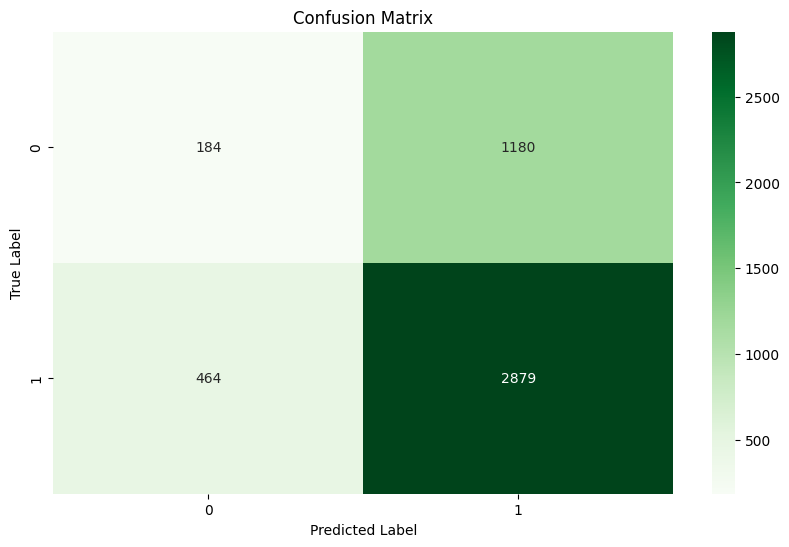

AUROC for Main Model: 0.49316359390611797


In [ ]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan')
knn.fit(X_train, y_train.values.ravel())

# Predict
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = final_df['obesity'].unique()

# Confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Greens', annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for the positive class
y_pred_proba_main = knn.predict_proba(X_test)[:, 1]

# Calculate AUROC
auroc_main = roc_auc_score(y_test, y_pred_proba_main)
print(f"AUROC for Main Model: {auroc_main}")

### Training and Testing the Demographic-Features-Only Model

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[2584  759]
 [1072  292]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      3343
           1       0.28      0.21      0.24      1364

    accuracy                           0.61      4707
   macro avg       0.49      0.49      0.49      4707
weighted avg       0.58      0.61      0.59      4707



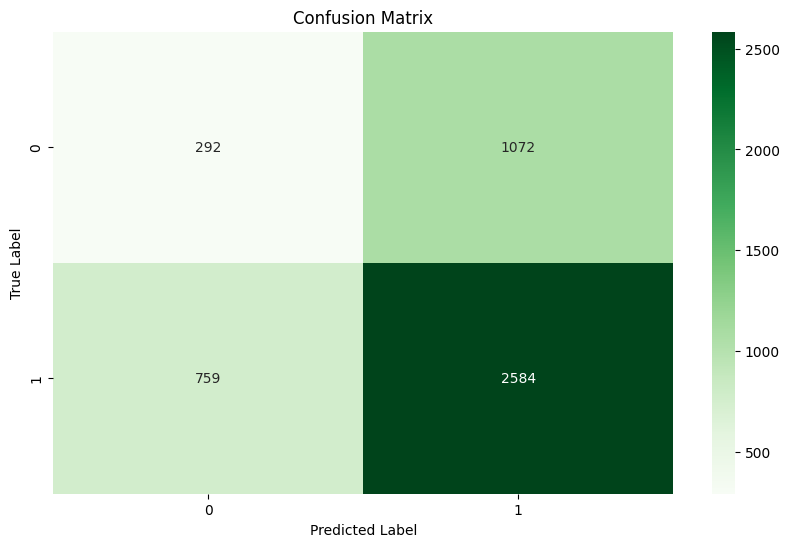

AUROC for Demographic-Features-Only Model: 0.5066279563459516


In [ ]:
# Split data into features and label
X = demographic[['Age', 'Gender']]
y = demographic[['obesity']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = demographic['obesity'].unique()

# Confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Greens', annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for the positive class
y_pred_proba_demographic = knn.predict_proba(X_test)[:, 1]

# Calculate AUROC
auroc_demographic = roc_auc_score(y_test, y_pred_proba_demographic)
print(f"AUROC for Demographic-Features-Only Model: {auroc_demographic}")

### Training and Testing the Health-Related-Features-Only Model

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[2843  500]
 [1160  204]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      3343
           1       0.29      0.15      0.20      1364

    accuracy                           0.65      4707
   macro avg       0.50      0.50      0.49      4707
weighted avg       0.59      0.65      0.61      4707



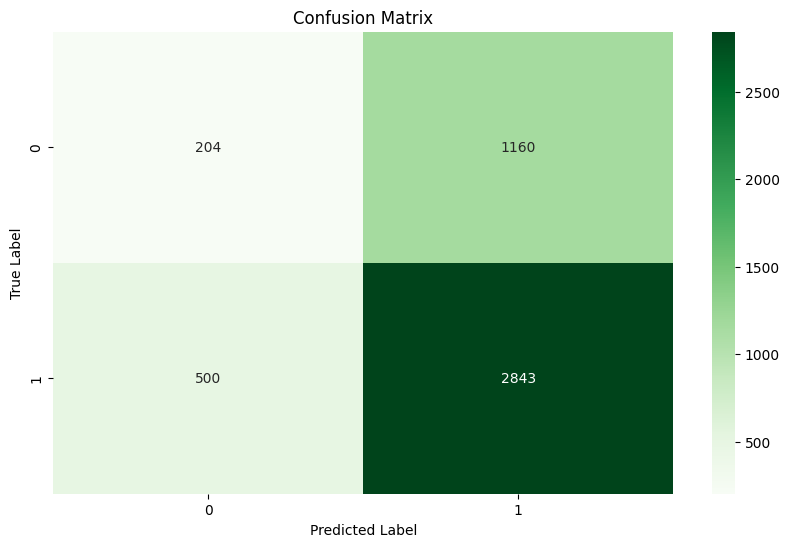

AUROC for Health-Related-Features-Only Model: 0.49141156335775815


In [ ]:
# Split data into features and label
X = health_related[['Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]
y = health_related[['obesity']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = demographic['obesity'].unique()

# Confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Greens', annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for the positive class
y_pred_proba_health = knn.predict_proba(X_test)[:, 1]

# Calculate AUROC
auroc_health = roc_auc_score(y_test, y_pred_proba_health)
print(f"AUROC for Health-Related-Features-Only Model: {auroc_health}")

###Compare AUC

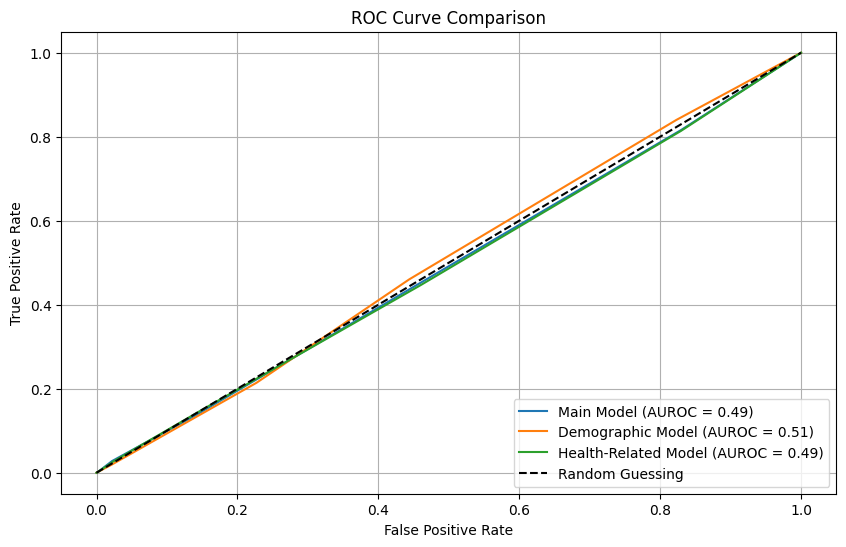

In [ ]:
# Calculate ROC curves
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba_main)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_demographic)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_proba_health)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, label=f"Main Model (AUROC = {auroc_main:.2f})")
plt.plot(fpr2, tpr2, label=f"Demographic Model (AUROC = {auroc_demographic:.2f})")
plt.plot(fpr3, tpr3, label=f"Health-Related Model (AUROC = {auroc_health:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()